In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("SpotifyFeaturesCleaned.csv")

In [7]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,genre_encoded,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,Movie,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,4,0.339614,0.900856,1,0.032070,0.642704,0.814,15,False,False,False,True,False
1,Movie,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,9,0.142710,0.834469,0,0.068374,0.675801,0.816,15,False,False,False,True,False
2,Movie,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,3,0.094241,0.686429,0,0.014818,0.325182,0.368,15,False,False,False,False,True
3,Movie,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,4,0.089697,0.716695,1,0.018311,0.665238,0.227,15,False,False,False,True,False
4,Movie,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,8,0.194208,0.557054,1,0.024767,0.518516,0.390,15,False,False,False,True,False


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


### Veriyi eğitim / test olarak ayıralım

In [10]:
X = df.drop(['genre', 'genre_encoded'], axis=1) # axis = 1 sütünları siler.
y = df['genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# X_train	modelin öğreneceği giriş verileri
# X_test	testte kullanılacak giriş verileri
# y_train	modelin öğreneceği doğru tür etiketleri
# y_test	testte modelin tahminleriyle karşılaştıracağımız doğru etiketler
# verilerin -> % 80 eğitim, % 20 test
# stratify -> Veri kümesindeki sınıf dağılımını koruyarak eğitim ve test kümelerine ayır. Eğitim ve test kümelerinde de aynı oranlar korunur

###  Logistic Regression

Lojistik regresyon, çok sınıflı sınıflandırma için temel ve hızlı çalışan bir algoritmadır.
max_iter=2000 ile modelin daha uzun sürede, yani daha fazla iterasyonda parametreleri optimize etmesini sağlıyoruz.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

#### Veri Ölçeklendirme (StandardScaler)

Özelliklerin (feature’ların) farklı ölçeklerde olması (örneğin biri 0-1 arasında, diğeri 0-1000 arasında olabilir) modelin öğrenmesini zorlaştırır.

StandardScaler, verileri ortalaması 0, standart sapması 1 olacak şekilde ölçeklendirir. Böylece model daha dengeli öğrenir.


Cross-validation accuracy scores: [0.38138485 0.38031007 0.37974582 0.38197598 0.38118014]
Mean CV accuracy: 0.38091937114833313
Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.18      0.20      1853
           2       0.41      0.34      0.37      1787
           3       0.32      0.23      0.27      1805
           4       0.67      0.73      0.70      1081
           5       0.21      0.13      0.16      1871
           6       0.51      0.47      0.49      1851
           7       0.94      0.93      0.93      1936
           8       0.27      0.42      0.33      1733
           9       0.18      0.16      0.17      1740
          10       0.44      0.48      0.46      1876
          11       0.25      0.29      0.27      1860
          12       0.31      0.38      0.34      1859
          13       0.20      0.12      0.15      1909
          14       0.34      0.26      0.30      1888
          15       0.47      0.38    

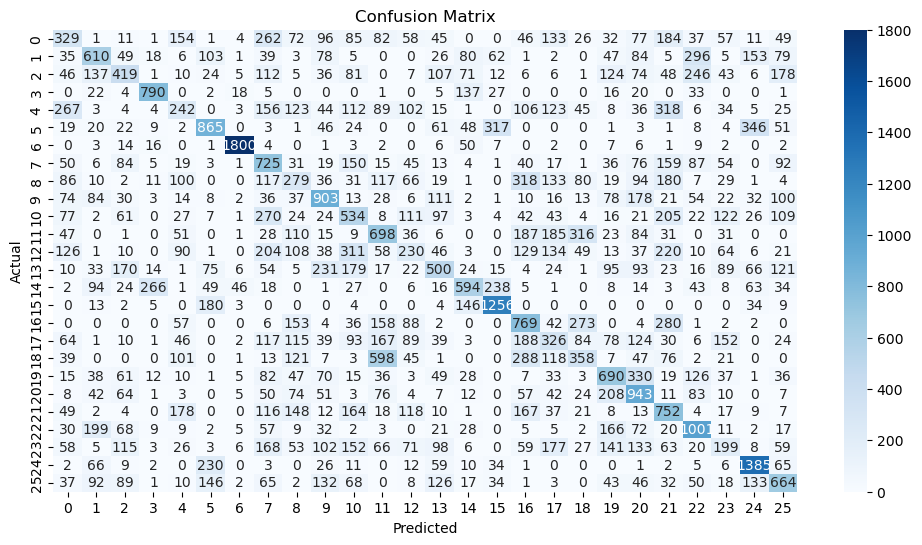

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

y_pred = logreg.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Çapraz Doğrulama ile Model Performansını Ölçme

Modelin farklı veri bölümlerinde ne kadar iyi çalıştığını anlamak için eğitim verisini 5 parçaya bölüp (5-fold CV) test ediyoruz.
Böylece modelin genel performansı hakkında daha güvenilir bilgi alıyoruz

#### Test Verisi Üzerinde Tahmin ve Değerlendirme

predict ile eğitilen modeli daha önce görmediği test verisi üzerinde deniyoruz.



#### Sınıflandırma Raporu ve Karışıklık Matrisi (Confusion Matrix) Görselleştirmesi

classification_report ile her sınıf için doğruluk, kesinlik, duyarlılık ve F1 skorlarını görüyoruz.
Karışıklık matrisi, modelin hangi türleri doğru tahmin ettiğini, hangilerinde hata yaptığını detaylı gösterir.
Bu grafikle modelin performansını daha iyi analiz edebiliriz.


Bu aşamada Lojistik Regresyon modeli ile müzik türlerini tahmin etmeye çalıştık. 

max_iter=2000 ile modelin daha uzun süre öğrenmesini sağladık,

random_state=42 ise sonuçların tekrar edilebilirliği için sabitlendik.

Modelin doğruluk oranı yaklaşık %38 civarında genel performans tatmin edici değil.

Bazı türlerde (örneğin 6 numaralı tür) çok iyi sonuçlar alınırken,
çoğu türde kesinlik ve duyarlılık düşük kalıyor.

Bu durum, veri setinin çok sınıflı ve karmaşık yapısının,
Lojistik Regresyon gibi lineer bir modelle tam olarak yakalanamadığını gösteriyor.

Ayrıca model, türler arasında ayırt etmede zorlanıyor ve birçok türü yanlış sınıflandırıyor.

Sonuç olarak, bu model temel ve hızlı bir başlangıç noktası sağladı,
ancak ileriye gitmek için daha karmaşık modeller,
güçlü özellik mühendisliği ve hiperparametre optimizasyonu şart.

Şimdi bu adımlarla performansı artırmaya odaklanacağız.

### Random Forest

Random Forest, birden fazla karar ağacının birleşiminden oluşan güçlü bir topluluk (ensemble) öğrenme yöntemidir. Her ağaç, veri setinin rastgele bir alt kümesi ve özelliklerin rastgele bir alt kümesi ile eğitilir. Bu sayede model, tek bir karar ağacının aşırı öğrenme (overfitting) yapma riskini azaltır ve genelleme yeteneğini artırır.

Karar ağaçları basit ve yorumlanabilir olsa da genellikle tek başlarına yüksek varyanslıdırlar ve yeni verilere karşı hassas olabilirler. Random Forest, bu ağaçları bir araya getirerek daha stabil, daha doğru ve daha güvenilir sonuçlar elde etmeyi sağlar.

Ayrıca, çok sınıflı ve karmaşık veri setlerinde (bizim müzik türleri gibi) Random Forest, karmaşık ilişkileri daha iyi yakalayabilir.

Bu yüzden Lojistik Regresyon’dan sonra Random Forest’a geçerek modelimizin performansını artırmayı hedefliyoruz.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1) 

modeli oluşturduk. n_jobs=-1 tüm çekirdekleri kullanır

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

modeli eğittik

#### Çapraz doğrulama ile doğruluk skoru

In [26]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
"Cross-validation accuracy scores:", cv_scores
"Mean CV accuracy:", cv_scores.mean()

('Mean CV accuracy:', 0.37735646589310246)

In [27]:
y_pred = rf.predict(X_test)

test verisi üzerinde tahmin yaptık

In [29]:
"Classification Report:" 
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.13      0.10      0.12      1853\n           2       0.60      0.56      0.58      1787\n           3       0.39      0.39      0.39      1805\n           4       0.76      0.76      0.76      1081\n           5       0.03      0.03      0.03      1871\n           6       0.62      0.61      0.61      1851\n           7       0.97      0.93      0.95      1936\n           8       0.38      0.42      0.40      1733\n           9       0.11      0.10      0.11      1740\n          10       0.52      0.54      0.53      1876\n          11       0.19      0.20      0.20      1860\n          12       0.13      0.15      0.14      1859\n          13       0.05      0.05      0.05      1909\n          14       0.36      0.34      0.35      1888\n          15       0.60      0.55      0.57      1561\n          16       0.75      0.87      0.81      1656\n          17       0.10      0.11      0.11      1877\n       

performans raporu oluşturduk

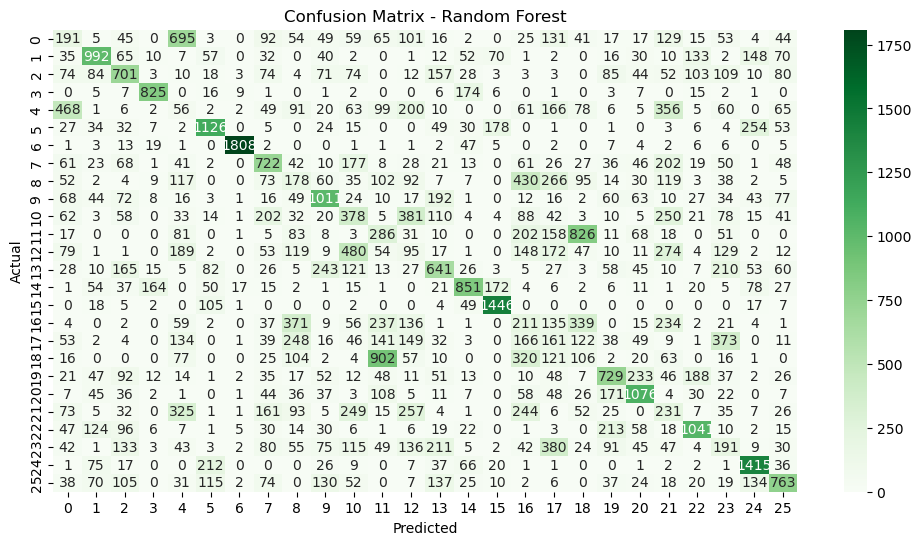

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Bu aşamada, Logistic Regression modelinden sonra daha güçlü bir algoritma olan Random Forest ile tahminleme denemesi yaptık.

random_state=42: Deneyin tekrar edilebilirliğini sağlamak için sabitlendi.

n_jobs=-1: Tüm işlemci çekirdeklerini kullanarak eğitim sürecini hızlandırdı.

Veriler üzerinde önceden yapılan normalizasyon işlemleri bu modelde gerekmemektedir çünkü ağaç tabanlı modeller özelliklerin ölçeğinden etkilenmez.

Ortalama çapraz doğrulama (CV) doğruluk skoru: %37.7
Logistic Regression ile benzer ama bazı sınıflarda gözle görülür iyileşmeler var.


### XGBoost

Zayıf modeller (decision tree’ler) arka arkaya eğitilir.

Her bir yeni model, önceki modelin hatalarını düzeltmeye çalışır.

Bu döngü, hata minimize edilene kadar devam eder.

Sonuçta ortaya çok güçlü bir model çıkar.

Yani: İlk ağaç tahmin eder, ikinci ağaç onun hatalarını düzeltir, üçüncü ağaç onların hatasını düzeltir… Ve böyle böyle bir ordu gibi hareket eden zeki ağaçlar ortaya çıkar.

Regularization (L1 ve L2) kullanır → Overfitting’e karşı dayanıklı.

Sparsity aware → Eksik verilerle çalışabiliyor.

Parallel training → Eğitim çok hızlı.

Early stopping → Gereksiz yere fazla öğrenmez.

Feature importance hesaplaması çok kolay.

In [34]:
from xgboost import XGBClassifier

In [35]:
print("Min y_train:", y_train.min())
print("Max y_train:", y_train.max())
print("Min y_test:", y_test.min())
print("Max y_test:", y_test.max())


Min y_train: 1
Max y_train: 26
Min y_test: 1
Max y_test: 26


In [36]:
y_train = y_train - y_train.min()  # y_train.min() = -5 ise tüm etiketler 5 artacak
y_test = y_test - y_test.min()


### RandomizedSearchCV ile Hiperparametre Optimizasyonu

 Modelimiz XGBClassifier için belirlediğimiz hiperparametre aralıklarından rastgele belirli sayıda kombinasyon seçilir ve denenir.

GridSearchCV gibi tüm kombinasyonları denemek yerine, randomized search belirttiğimiz n_iter kadar rastgele kombinasyon deneyerek süreci hızlandırır.

Her kombinasyon için yine 3 katlı çapraz doğrulama (cv=3) yapılarak ortalama doğruluk hesaplanır.

En iyi sonucu veren parametreler best_params_ olarak bulunur.

Bu yöntem, özellikle çok sayıda parametre ve geniş aralıklar olduğunda eğitim süresini ciddi oranda kısaltır.

verbose=2 ile süreci detaylı takip ederiz, n_jobs=-1 ile işlemcinin tüm çekirdeklerini kullanırız.


In [38]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 1],
    'min_child_weight': [1, 5]
}

xgb = XGBClassifier(eval_metric='mlogloss')

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params,
                                   n_iter=30, scoring='accuracy', cv=3, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}
Best accuracy: 0.4477977687495969


In [61]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

en iyi modeli alarak veri tahmin yaptık

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


performans metrikleri için gerekli kütüphaneleri tanımladık

In [69]:
# Doğruluk skoru
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Seti Doğruluk Skoru: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrisi:")
print(cm)

# Sınıflandırma raporu (precision, recall, f1-score)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Test Seti Doğruluk Skoru: 0.4496
Confusion Matrisi:
[[ 306    5    8    0  277    3    1  135   53   59   89   93  133   45
     1    1   59  158   33   22   34  213   15   60    4   46]
 [  30 1019   66   11   13   57    0   38    2   45    2    0    1   11
    51   62    1    1    0   26   32    9  118    3  116   73]
 [  46   69  715    2   10   22    2   94    5   44   99    1   29  142
    35    1    7   10    1  104   37   66  100   64   10   90]
 [   0    8    7  836    0   16    9    3    0    1    0    0    0    4
   153    9    0    2    0    7    7    0   16    2    1    0]
 [ 213    5    1    4  292    2    1   68   81   27   83  111  172   19
     1    0  143  111   58    6   14  381    3   37    2   36]
 [  25   20   25    8    3 1173    0    2    0   24   20    0    4   65
    35  140    0    0    0    1    0    4    3    8  249   42]
 [   0    2   13   17    0    0 1812    4    0    0    1    1    0    2
    46    5    0    4    1    7    5    2    5    5    0    4]
 [ 

Bazı sınıflarda (mesela 6, 15, 24) precision ve recall çok iyi, yani o türleri model gerçekten iyi ayırt ediyor.

Ama bazı sınıflarda (0, 4, 8 gibi) sonuçlar çok düşük, model orada büyük zorluk çekiyor.

Confusion matrisinden bazı sınıflar arasında ciddi karışıklık var, yani model türleri birbirine karıştırıyor.

In [78]:
pd.Series(y_train).value_counts()


genre_encoded
6     7745
24    7717
12    7634
13    7553
16    7509
9     7501
4     7482
10    7439
11    7436
21    7417
0     7410
5     7405
18    7386
25    7277
23    7271
2     7218
17    7194
1     7149
20    7142
22    7099
19    7017
8     6961
7     6931
15    6624
14    6245
3     4322
Name: count, dtype: int64

Sınıflar birbirine çok yakın sayıda, neredeyse dengeli sayılır. Dengesizlik problemimiz yok

In [114]:
import pickle

filename = 'classification_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_model, file)  # Burada best_model kullanıyoruz

print(f"Model başarıyla '{filename}' olarak kaydedildi.")



Model başarıyla 'classification_model.pkl' olarak kaydedildi.


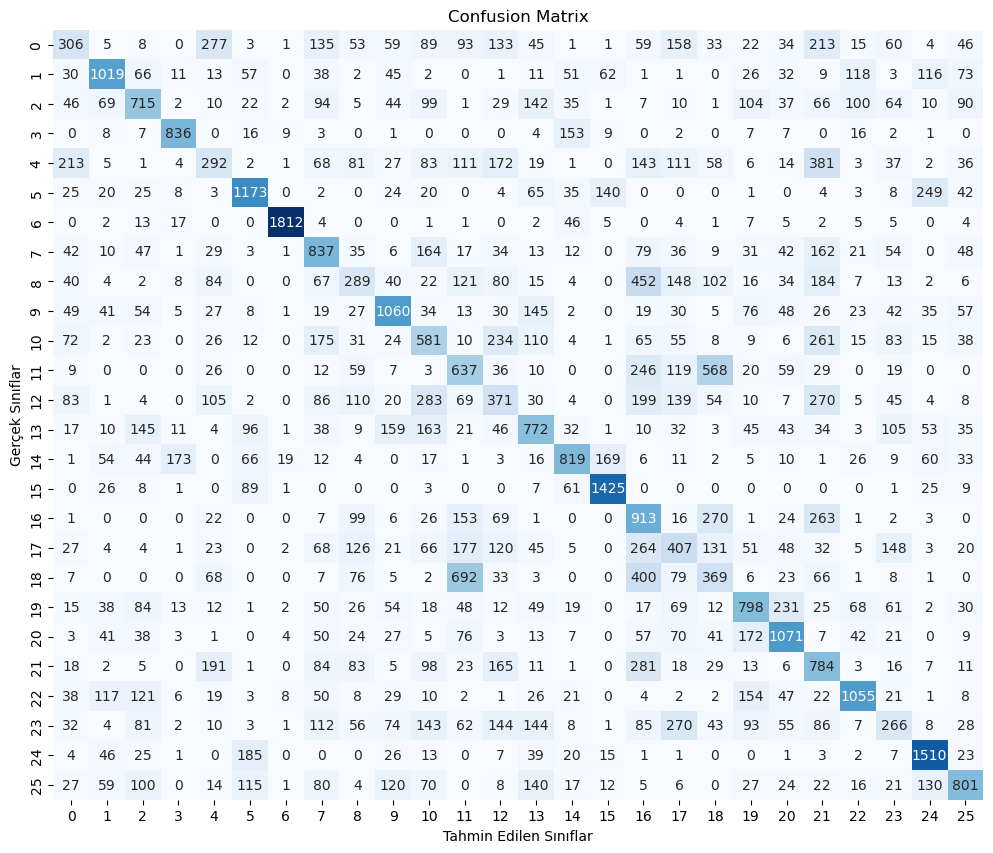

In [116]:

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıflar')
plt.ylabel('Gerçek Sınıflar')
plt.show()

              precision    recall  f1-score       support
0              0.276923  0.165138  0.206897   1853.000000
1              0.642092  0.570229  0.604031   1787.000000
2              0.441358  0.396122  0.417518   1805.000000
3              0.757933  0.773358  0.765568   1081.000000
4              0.232484  0.156066  0.186760   1871.000000
5              0.631664  0.633712  0.632686   1851.000000
6              0.971061  0.935950  0.953183   1936.000000
7              0.398951  0.482977  0.436962   1733.000000
8              0.239437  0.166092  0.196132   1740.000000
9              0.562931  0.565032  0.563980   1876.000000
10             0.288337  0.312366  0.299871   1860.000000
11             0.273625  0.342657  0.304275   1859.000000
12             0.213833  0.194343  0.203622   1909.000000
13             0.411295  0.408898  0.410093   1888.000000
14             0.603093  0.524664  0.561151   1561.000000
15             0.773616  0.860507  0.814751   1656.000000
16            

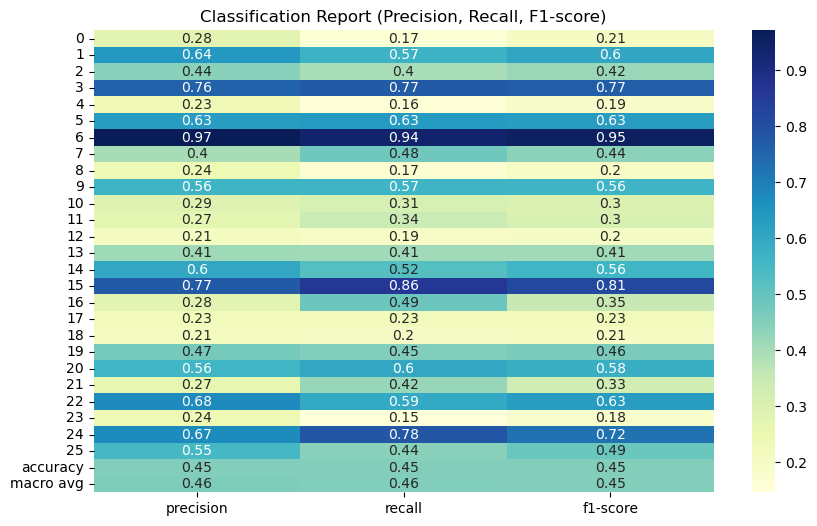

In [97]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

plt.figure(figsize=(10,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report (Precision, Recall, F1-score)')
plt.show()